Hotel Reviews across Europe. A data set provided by booking.com

In [2]:
#inicitlizing pyspark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('disso').getOrCreate()

In [10]:
#importing the libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from cycler import cycler
import numpy as np
from pyspark.sql.functions import col
%matplotlib inline 

In [4]:
#loading the file 
data = spark.read.csv('Hotel_Reviews.csv', header=True, inferSchema=True)

In [5]:
#checking the file 
data.head()

Row(Hotel_Address=' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands', Additional_Number_of_Scoring=194, Review_Date='8/3/2017', Average_Score=7.7, Hotel_Name='Hotel Arena', Reviewer_Nationality=' Russia ', Negative_Review=' I am so angry that i made this post available via all possible sites i use when planing my trips so no one will make the mistake of booking this place I made my booking via booking com We stayed for 6 nights in this hotel from 11 to 17 July Upon arrival we were placed in a small room on the 2nd floor of the hotel It turned out that this was not the room we booked I had specially reserved the 2 level duplex room so that we would have a big windows and high ceilings The room itself was ok if you don t mind the broken window that can not be closed hello rain and a mini fridge that contained some sort of a bio weapon at least i guessed so by the smell of it I intimately asked to change the room and after explaining 2 times that i booked a duplex btw it costs th

In [8]:
#checking the schema
data.printSchema()

root
 |-- Hotel_Address: string (nullable = true)
 |-- Additional_Number_of_Scoring: integer (nullable = true)
 |-- Review_Date: string (nullable = true)
 |-- Average_Score: double (nullable = true)
 |-- Hotel_Name: string (nullable = true)
 |-- Reviewer_Nationality: string (nullable = true)
 |-- Negative_Review: string (nullable = true)
 |-- Review_Total_Negative_Word_Counts: integer (nullable = true)
 |-- Total_Number_of_Reviews: integer (nullable = true)
 |-- Positive_Review: string (nullable = true)
 |-- Review_Total_Positive_Word_Counts: integer (nullable = true)
 |-- Total_Number_of_Reviews_Reviewer_Has_Given: integer (nullable = true)
 |-- Reviewer_Score: double (nullable = true)
 |-- Tags: string (nullable = true)
 |-- days_since_review: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- lng: string (nullable = true)



In [25]:
data.createOrReplaceTempView('hotels')

In [9]:
data.select('Additional_Number_of_Scoring').describe().show()

+-------+----------------------------+
|summary|Additional_Number_of_Scoring|
+-------+----------------------------+
|  count|                      515738|
|   mean|            498.081836126095|
| stddev|          500.53846669900753|
|    min|                           1|
|    max|                        2682|
+-------+----------------------------+



In [74]:
spark.sql('SELECT COUNT(DISTINCT Hotel_Name) FROM hotels').show()

+--------------------------+
|count(DISTINCT Hotel_Name)|
+--------------------------+
|                      1492|
+--------------------------+



In [75]:
high_scores = spark.sql('SELECT * FROM hotels WHERE Average_Score BETWEEN 9.0 AND 10.0').groupBy('Average_Score').count().orderBy('count').show()
low_scores = spark.sql('SELECT * FROM hotels WHERE Average_Score BETWEEN 5.0 AND 7.9').groupBy('Average_Score').count().orderBy('count').show()

+-------------+-----+
|Average_Score|count|
+-------------+-----+
|          9.8|   28|
|          9.6|  915|
|          9.5| 1207|
|          9.4| 9339|
|          9.3|12659|
|          9.2|12935|
|          9.0|21051|
|          9.1|21379|
+-------------+-----+

+-------------+-----+
|Average_Score|count|
+-------------+-----+
|          5.2|   65|
|          6.6|  400|
|          7.2|  684|
|          6.7|  965|
|          6.4| 1163|
|          6.8| 1335|
|          6.9| 1737|
|          7.0| 3899|
|          7.3| 3997|
|          7.4| 6300|
|          7.6| 6684|
|          7.1| 6780|
|          7.7|11829|
|          7.5|13720|
|          7.9|15194|
|          7.8|19895|
+-------------+-----+



In [14]:
data.filter(
    "Review_Total_Negative_Word_Counts > 380").select(
    'Review_Total_Negative_Word_Counts', 'Average_Score').orderBy(
    'Average_Score').show()

+---------------------------------+-------------+
|Review_Total_Negative_Word_Counts|Average_Score|
+---------------------------------+-------------+
|                              393|          6.7|
|                              384|          6.9|
|                              392|          7.1|
|                              386|          7.3|
|                              403|          7.3|
|                              389|          7.4|
|                              382|          7.5|
|                              386|          7.5|
|                              384|          7.5|
|                              385|          7.6|
|                              383|          7.6|
|                              397|          7.7|
|                              384|          7.7|
|                              402|          7.8|
|                              391|          7.8|
|                              399|          7.8|
|                              389|          7.8|


In [15]:
data.filter((data[
    'Review_Total_Positive_Word_Counts'] > 0) & (data[
    'Average_Score'] > 7.9)).select('Review_Total_Positive_Word_Counts', 'Average_Score').orderBy(
    'Average_Score').show()
# & is used for "and"

+---------------------------------+-------------+
|Review_Total_Positive_Word_Counts|Average_Score|
+---------------------------------+-------------+
|                               38|          8.0|
|                               40|          8.0|
|                               26|          8.0|
|                               17|          8.0|
|                               37|          8.0|
|                               36|          8.0|
|                               69|          8.0|
|                               41|          8.0|
|                               51|          8.0|
|                               81|          8.0|
|                                3|          8.0|
|                               58|          8.0|
|                               16|          8.0|
|                               35|          8.0|
|                              101|          8.0|
|                               26|          8.0|
|                                7|          8.0|


In [16]:
data.filter((data['Review_Total_Negative_Word_Counts'] > 380) | (data[
    'Average_Score'] > 7.9)).select(
    'Review_Total_Negative_Word_Counts', 'Average_Score').show()
# | is used for "or"

+---------------------------------+-------------+
|Review_Total_Negative_Word_Counts|Average_Score|
+---------------------------------+-------------+
|                              397|          7.7|
|                                9|          8.5|
|                               52|          8.5|
|                               11|          8.5|
|                                4|          8.5|
|                               16|          8.5|
|                               24|          8.5|
|                               12|          8.5|
|                               94|          8.5|
|                               40|          8.5|
|                               18|          8.5|
|                              155|          8.5|
|                               32|          8.5|
|                               26|          8.5|
|                               27|          8.5|
|                                0|          8.5|
|                              108|          8.5|


In [17]:
data.filter((data['Review_Total_Negative_Word_Counts'] > 380) &~ (data[
    'Average_Score'] > 7.9)).select('Review_Total_Negative_Word_Counts', 
                                    'Average_Score').show()
# ~ for "not" (where reviews were >380 AND NOT where > 7.9)

+---------------------------------+-------------+
|Review_Total_Negative_Word_Counts|Average_Score|
+---------------------------------+-------------+
|                              397|          7.7|
|                              384|          7.7|
|                              383|          7.6|
|                              389|          7.9|
|                              385|          7.6|
|                              384|          7.5|
|                              392|          7.1|
|                              383|          7.9|
|                              393|          6.7|
|                              384|          6.9|
|                              399|          7.8|
|                              382|          7.5|
|                              403|          7.3|
|                              389|          7.4|
|                              386|          7.5|
|                              389|          7.8|
|                              386|          7.3|


In [18]:
results = data.filter(data['Average_Score'] > 8.0).collect()
row = results[0]
row.asDict()['Hotel_Name']

'K K Hotel George'

In [19]:
a = data.agg({'Average_Score': 'max'}).show()
b = data.agg({'Average_Score': 'min'}).show()

+------------------+
|max(Average_Score)|
+------------------+
|               9.8|
+------------------+

+------------------+
|min(Average_Score)|
+------------------+
|               5.2|
+------------------+



In [20]:
max_rev = data.agg({'Review_Total_Negative_Word_Counts': 'max', 
                    'Review_Total_Positive_Word_Counts': 'max'}).show()

+--------------------------------------+--------------------------------------+
|max(Review_Total_Positive_Word_Counts)|max(Review_Total_Negative_Word_Counts)|
+--------------------------------------+--------------------------------------+
|                                   395|                                   408|
+--------------------------------------+--------------------------------------+



In [116]:
x = spark.sql(
    'SELECT * FROM hotels WHERE Reviewer_Score >= 8.0').groupBy(
    'Reviewer_Score').avg('Review_Total_Negative_Word_Counts', 
                          'Review_Total_Positive_Word_Counts').orderBy("Reviewer_Score").show()

+--------------+--------------------------------------+--------------------------------------+
|Reviewer_Score|avg(Review_Total_Negative_Word_Counts)|avg(Review_Total_Positive_Word_Counts)|
+--------------+--------------------------------------+--------------------------------------+
|           8.0|                     19.24158415841584|                    14.227722772277227|
|           8.1|                    17.923076923076923|                    15.102564102564102|
|           8.3|                     18.60460027232056|                     17.39415969655709|
|           8.5|                    16.403543307086615|                     14.05511811023622|
|           8.8|                     16.62228348661397|                    18.819617049688773|
|           9.0|                    14.460587326120557|                     17.21174652241113|
|           9.2|                     14.17040779748391|                     20.57607155659492|
|           9.4|                    14.74603174603

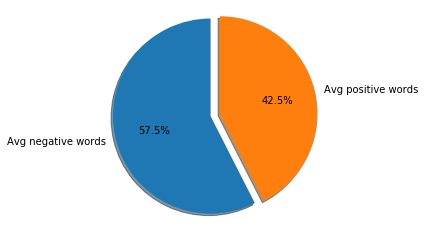

In [115]:
labels = 'Avg negative words', 'Avg positive words'
sizes = [19.24158415841584, 14.227722772277227 ]
explode = (0.1, 0)  # only "explode" the 1nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [23]:
group_data = data.groupby('Average_Score')
group_data.agg({'Review_Total_Negative_Word_Counts':'max'}).orderBy('Average_Score').show()

+-------------+--------------------------------------+
|Average_Score|max(Review_Total_Negative_Word_Counts)|
+-------------+--------------------------------------+
|          5.2|                                   112|
|          6.4|                                   363|
|          6.6|                                   275|
|          6.7|                                   393|
|          6.8|                                   373|
|          6.9|                                   384|
|          7.0|                                   376|
|          7.1|                                   392|
|          7.2|                                   366|
|          7.3|                                   403|
|          7.4|                                   389|
|          7.5|                                   386|
|          7.6|                                   385|
|          7.7|                                   397|
|          7.8|                                   402|
|         

In [24]:
from pyspark.sql.functions import countDistinct, avg, stddev

In [29]:
data.select(countDistinct('Average_Score')).show()

+-----------------------------+
|count(DISTINCT Average_Score)|
+-----------------------------+
|                           34|
+-----------------------------+



In [31]:
min_avg = data.orderBy('Average_Score', ascending=True).select('Hotel_Name', "Average_Score", 'Hotel_Address').collect()
min_avg 
x = pd.DataFrame(data=min_avg)
x

,0,1,2
0,Hotel Liberty,5.2,Viale Bligny 56 Milan City Center 20136 Milan ...
1,Hotel Liberty,5.2,Viale Bligny 56 Milan City Center 20136 Milan ...
2,Hotel Liberty,5.2,Viale Bligny 56 Milan City Center 20136 Milan ...
3,Hotel Liberty,5.2,Viale Bligny 56 Milan City Center 20136 Milan ...
4,Hotel Liberty,5.2,Viale Bligny 56 Milan City Center 20136 Milan ...
...,...,...,...
515733,Ritz Paris,9.8,15 Place Vend me 1st arr 75001 Paris France
515734,Ritz Paris,9.8,15 Place Vend me 1st arr 75001 Paris France
515735,Ritz Paris,9.8,15 Place Vend me 1st arr 75001 Paris France
515736,Ritz Paris,9.8,15 Place Vend me 1st arr 75001 Paris France


In [32]:
data.groupBy("Average_score").count().orderBy('count').show()

+-------------+-----+
|Average_score|count|
+-------------+-----+
|          9.8|   28|
|          5.2|   65|
|          6.6|  400|
|          7.2|  684|
|          9.6|  915|
|          6.7|  965|
|          6.4| 1163|
|          9.5| 1207|
|          6.8| 1335|
|          6.9| 1737|
|          7.0| 3899|
|          7.3| 3997|
|          7.4| 6300|
|          7.6| 6684|
|          7.1| 6780|
|          9.4| 9339|
|          7.7|11829|
|          9.3|12659|
|          9.2|12935|
|          7.5|13720|
+-------------+-----+
only showing top 20 rows



# Lowest average hotel rates

Hotel Liberty 

In [33]:

x3 = data.orderBy('Average_Score').select('Hotel_Name', "Average_Score").collect()
df3 = pd.DataFrame(data=x3)
df3[0:65]

,0,1
0,Hotel Liberty,5.2
1,Hotel Liberty,5.2
2,Hotel Liberty,5.2
3,Hotel Liberty,5.2
4,Hotel Liberty,5.2
...,...,...
60,Hotel Liberty,5.2
61,Hotel Liberty,5.2
62,Hotel Liberty,5.2
63,Hotel Liberty,5.2


In [34]:
data.filter(data.Hotel_Name.contains('Hotel Liberty')).orderBy('Reviewer_Score').select(
    'Hotel_Name', 'Reviewer_Score').show()
data.filter(data.Hotel_Name.contains('Hotel Liberty')).orderBy('Reviewer_Score', ascending=False).select(
    'Hotel_Name', 'Reviewer_Score').show()

+-------------+--------------+
|   Hotel_Name|Reviewer_Score|
+-------------+--------------+
|Hotel Liberty|           2.5|
|Hotel Liberty|           2.5|
|Hotel Liberty|           2.5|
|Hotel Liberty|           2.5|
|Hotel Liberty|           2.9|
|Hotel Liberty|           2.9|
|Hotel Liberty|           2.9|
|Hotel Liberty|           3.3|
|Hotel Liberty|           3.3|
|Hotel Liberty|           3.3|
|Hotel Liberty|           3.3|
|Hotel Liberty|           3.3|
|Hotel Liberty|           3.3|
|Hotel Liberty|           3.3|
|Hotel Liberty|           3.5|
|Hotel Liberty|           3.5|
|Hotel Liberty|           3.8|
|Hotel Liberty|           3.8|
|Hotel Liberty|           3.8|
|Hotel Liberty|           3.8|
+-------------+--------------+
only showing top 20 rows

+-------------+--------------+
|   Hotel_Name|Reviewer_Score|
+-------------+--------------+
|Hotel Liberty|           8.8|
|Hotel Liberty|           8.8|
|Hotel Liberty|           8.3|
|Hotel Liberty|           7.9|
|Hotel Libert

In [35]:
hot_liberty = data.filter(data.Hotel_Name.contains('Hotel Liberty')).select('Hotel_Name', 
                                                                            'Review_Total_Negative_Word_Counts')
hot_liberty.groupby().sum().show()

liberty2 = data.filter(data.Hotel_Name.contains('Hotel Liberty')).select(
    'Hotel_Name', 'Review_Total_Positive_Word_Counts')
liberty2.groupby().sum().show()

+--------------------------------------+
|sum(Review_Total_Negative_Word_Counts)|
+--------------------------------------+
|                                  2087|
+--------------------------------------+

+--------------------------------------+
|sum(Review_Total_Positive_Word_Counts)|
+--------------------------------------+
|                                   795|
+--------------------------------------+



In [36]:
#Common positive words in Hotel Liberty reviews 

lib = data.filter(data.Hotel_Name.contains('Hotel Liberty')).select(
    'Hotel_Name', 'Positive_Review')
lib2 = lib.filter(lib.Positive_Review.contains('location')).select('Hotel_Name', 'Positive_Review')
lib2.groupBy().count().show()

lib3 = lib.filter(lib.Positive_Review.contains('Trams')).select('Hotel_Name', 'Positive_Review')
lib3.groupBy().count().show()

+-----+
|count|
+-----+
|   13|
+-----+

+-----+
|count|
+-----+
|    1|
+-----+



In [47]:
lib_brk_1 = lib.filter(lib.Positive_Review.contains('breakfast')).select('Hotel_Name', 'Positive_Review')
lib_brk_1.groupBy().count().show()

lib_brk_2 = lib.filter(lib.Positive_Review.contains('Breakfast')).select('Hotel_Name', 'Positive_Review')
lib_brk_2.groupBy().count().show()

lib_neg = data.filter(data.Hotel_Name.contains('Hotel Liberty')).select(
    'Hotel_Name', 'Negative_Review')
lib_neg2 = lib_neg.filter(lib_neg.Negative_Review.contains('wifi')).select('Hotel_Name', 'Negative_Review')
lib_neg2.groupBy().count().show()

+-----+
|count|
+-----+
|   11|
+-----+

+-----+
|count|
+-----+
|    6|
+-----+

+-----+
|count|
+-----+
|    4|
+-----+



Hotel Cavendish 

In [42]:
data.filter('Average_Score = 6.4').select('Hotel_Name', "Average_Score").show()

+---------------+-------------+
|     Hotel_Name|Average_Score|
+---------------+-------------+
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
|Hotel Cavendish|          6.4|
+---------------+-------------+
only showing top 20 rows



In [43]:
x3 = data.orderBy('Average_Score').select('Hotel_Name', "Average_Score").collect()
df3 = pd.DataFrame(data=x3)
df3[65:75]

,0,1
65,Hotel Cavendish,6.4
66,Hotel Cavendish,6.4
67,Hotel Cavendish,6.4
68,Hotel Cavendish,6.4
69,Hotel Cavendish,6.4
70,Hotel Cavendish,6.4
71,Hotel Cavendish,6.4
72,Hotel Cavendish,6.4
73,Hotel Cavendish,6.4
74,Hotel Cavendish,6.4


In [46]:
data.filter(data.Hotel_Name.contains('Hotel Cavendish')).groupBy(    
    "Hotel_Name" ,'Average_Score').count().show()

+---------------+-------------+-----+
|     Hotel_Name|Average_Score|count|
+---------------+-------------+-----+
|Hotel Cavendish|          6.4|  920|
+---------------+-------------+-----+



In [45]:
#Common positive words in Hotel Cavendish reviews 

cavend = data.filter(data.Hotel_Name.contains('Hotel Cavendish')).select(
    'Hotel_Name', 'Positive_Review')
cavend2 = cavend.filter(cavend.Positive_Review.contains('location')).select('Hotel_Name', 'Positive_Review')
cavend2.groupBy().count().show()

cavend3 = cavend.filter(cavend.Positive_Review.contains('central')).select('Hotel_Name', 'Positive_Review')
cavend3.groupBy().count().show()

cavend4 = cavend.filter(cavend.Positive_Review.contains('close to')).select('Hotel_Name', 'Positive_Review')
cavend4.groupBy().count().show()

+-----+
|count|
+-----+
|  273|
+-----+

+-----+
|count|
+-----+
|   27|
+-----+

+-----+
|count|
+-----+
|   39|
+-----+



In [49]:
cavend = data.filter(data.Hotel_Name.contains('Hotel Cavendish')).select(
    'Hotel_Name', 'Positive_Review')
cavend2 = cavend.filter(cavend.Positive_Review.contains('breakfast')).select('Hotel_Name', 'Positive_Review')
cavend2.groupBy().count().show()

cavend3 = cavend.filter(cavend.Positive_Review.contains('Breakfast')).select('Hotel_Name', 'Positive_Review')
cavend3.groupBy().count().show()

+-----+
|count|
+-----+
|  212|
+-----+

+-----+
|count|
+-----+
|   82|
+-----+



In [50]:
#Common negative words in Hotel Cavendish reviews 


cavend = data.filter(data.Hotel_Name.contains('Hotel Cavendish')).select(
    'Hotel_Name', 'Negative_Review')
cavend2 = cavend.filter(cavend.Negative_Review.contains('uncomfortable')).select('Hotel_Name', 'Negative_Review')
cavend2.groupBy().count().show()

cavend3 = cavend.filter(cavend.Negative_Review.contains('small')).select('Hotel_Name', 'Negative_Review')
cavend3.groupBy().count().show()

cavend4 = cavend.filter(cavend.Negative_Review.contains('tiny')).select('Hotel_Name', 'Negative_Review')
cavend4.groupBy().count().show()

+-----+
|count|
+-----+
|   28|
+-----+

+-----+
|count|
+-----+
|  186|
+-----+

+-----+
|count|
+-----+
|   54|
+-----+



In [51]:
cavend5 = cavend.filter(cavend.Negative_Review.contains('dirty')).select('Hotel_Name', 'Negative_Review')
cavend5.groupBy().count().show()

cavend5 = cavend.filter(cavend.Negative_Review.contains('unclean')).select('Hotel_Name', 'Negative_Review')
cavend5.groupBy().count().show()

cavend5 = cavend.filter(cavend.Negative_Review.contains(' not clean')).select('Hotel_Name', 'Negative_Review')
cavend5.groupBy().count().show()

+-----+
|count|
+-----+
|   53|
+-----+

+-----+
|count|
+-----+
|    3|
+-----+

+-----+
|count|
+-----+
|   12|
+-----+



In [52]:
cavend5 = cavend.filter(cavend.Negative_Review.contains('breakfast')).select('Hotel_Name', 'Negative_Review')
cavend5.groupBy().count().show()

cavend5 = cavend.filter(cavend.Negative_Review.contains('Breakfast')).select('Hotel_Name', 'Negative_Review')
cavend5.groupBy().count().show()

+-----+
|count|
+-----+
|  127|
+-----+

+-----+
|count|
+-----+
|   37|
+-----+



In [53]:

cav_neg = data.filter(data.Hotel_Name.contains('Hotel Cavendish')).select('Hotel_Name', 'Review_Total_Negative_Word_Counts')
cav_neg.groupby().sum().show()

cav_neg2 = data.filter(data.Hotel_Name.contains('Hotel Liberty')).select('Hotel_Name', 'Review_Total_Positive_Word_Counts')
cav_neg2.groupby().sum().show()

+--------------------------------------+
|sum(Review_Total_Negative_Word_Counts)|
+--------------------------------------+
|                                 25710|
+--------------------------------------+

+--------------------------------------+
|sum(Review_Total_Positive_Word_Counts)|
+--------------------------------------+
|                                   795|
+--------------------------------------+



In [58]:
# Savoy Hotel Amsterdam

In [54]:
#Common positive words in Savoy Hotel reviews 


savoy = data.filter(data.Hotel_Name.contains('Savoy Hotel Amsterdam')).select('Hotel_Name', 'Positive_Review')
sav2 = savoy.filter(savoy.Positive_Review.contains('location')).select('Hotel_Name', 'Positive_Review')
sav2.groupBy().count().show()

sav3 = savoy.filter(savoy.Positive_Review.contains('central')).select('Hotel_Name', 'Positive_Review')
sav3.groupBy().count().show()

sav4 = savoy.filter(savoy.Positive_Review.contains('close to')).select('Hotel_Name', 'Positive_Review')
sav4.groupBy().count().show()


+-----+
|count|
+-----+
|   44|
+-----+

+-----+
|count|
+-----+
|    2|
+-----+

+-----+
|count|
+-----+
|    9|
+-----+



In [55]:
sav2 = savoy.filter(savoy.Positive_Review.contains('breakfast')).select('Hotel_Name', 'Positive_Review')
sav2.groupBy().count().show()

sav2 = savoy.filter(savoy.Positive_Review.contains('Breakfast')).select('Hotel_Name', 'Positive_Review')
sav2.groupBy().count().show()

+-----+
|count|
+-----+
|    9|
+-----+

+-----+
|count|
+-----+
|    3|
+-----+



In [56]:
#Common negative words in Savoy Hotel reviews 

sav_neg = data.filter(data.Hotel_Name.contains('Savoy Hotel Amsterdam')).select(
    'Hotel_Name', 'Negative_Review')
sav_neg2 = cavend.filter(sav_neg.Negative_Review.contains('breakfast')).select('Hotel_Name', 'Negative_Review')
cavend2.groupBy().count().show()

cavend3 = cavend.filter(cavend.Negative_Review.contains('Breakfast')).select('Hotel_Name', 'Negative_Review')
cavend3.groupBy().count().show()

+-----+
|count|
+-----+
|   28|
+-----+

+-----+
|count|
+-----+
|   37|
+-----+



In [57]:
sav_neg = data.filter(data.Hotel_Name.contains(
    'Savoy Hotel Amsterdam')).select('Hotel_Name', 'Negative_Review')
sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('dirty')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('unclean')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('not clean')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()


sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('not cleaned')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

+-----+
|count|
+-----+
|   13|
+-----+

+-----+
|count|
+-----+
|    1|
+-----+

+-----+
|count|
+-----+
|    5|
+-----+

+-----+
|count|
+-----+
|    2|
+-----+



In [59]:
sav_neg = data.filter(data.Hotel_Name.contains(
    'Savoy Hotel Amsterdam')).select('Hotel_Name', 'Negative_Review')
sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('uncomfortable')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('small')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('tiny')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

+-----+
|count|
+-----+
|    5|
+-----+

+-----+
|count|
+-----+
|   25|
+-----+

+-----+
|count|
+-----+
|    5|
+-----+



In [60]:
sav_neg = data.filter(data.Hotel_Name.contains(
    'Savoy Hotel Amsterdam')).select('Hotel_Name', 'Negative_Review')
sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('wifi')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('wi fi')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('Wifi')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

sav_neg5 = sav_neg.filter(sav_neg.Negative_Review.contains('Wi fi')).select('Hotel_Name', 'Negative_Review')
sav_neg5.groupBy().count().show()

+-----+
|count|
+-----+
|   10|
+-----+

+-----+
|count|
+-----+
|    2|
+-----+

+-----+
|count|
+-----+
|    4|
+-----+

+-----+
|count|
+-----+
|    0|
+-----+



In [61]:
sav_neg = data.filter(data.Hotel_Name.contains('Savoy Hotel Amsterdam')).select('Hotel_Name', 'Review_Total_Negative_Word_Counts')
sav_neg.groupby().sum().show()

sav_pos = data.filter(data.Hotel_Name.contains('Savoy Hotel Amsterdam')).select('Hotel_Name', 'Review_Total_Positive_Word_Counts')
sav_pos.groupby().sum().show()

+--------------------------------------+
|sum(Review_Total_Negative_Word_Counts)|
+--------------------------------------+
|                                  9105|
+--------------------------------------+

+--------------------------------------+
|sum(Review_Total_Positive_Word_Counts)|
+--------------------------------------+
|                                  2984|
+--------------------------------------+



# The Highest Average Hotel Scores 

In [68]:
x2 = data.groupBy("Hotel_Name" ,'Average_Score').count().orderBy('Average_Score', ascending=False).show()


+--------------------+-------------+-----+
|          Hotel_Name|Average_Score|count|
+--------------------+-------------+-----+
|          Ritz Paris|          9.8|   28|
|                  41|          9.6|  103|
|H10 Casa Mimosa 4...|          9.6|  116|
|    Hotel The Serras|          9.6|  213|
|     Haymarket Hotel|          9.6|  121|
|   Hotel Casa Camper|          9.6|  301|
|H tel de La Tamis...|          9.6|   61|
|Hotel The Peninsu...|          9.5|   58|
|Palais Coburg Res...|          9.5|   16|
|Milestone Hotel K...|          9.5|   86|
|   Hotel Sacher Wien|          9.5|  130|
|Le Narcisse Blanc...|          9.5|   57|
|      The Soho Hotel|          9.5|  157|
|      Ham Yard Hotel|          9.5|  141|
|Charlotte Street ...|          9.5|  141|
|Waldorf Astoria A...|          9.5|  142|
|Taj 51 Buckingham...|          9.5|  133|
|Mercer Hotel Barc...|          9.5|  146|
|La Chambre du Marais|          9.4|   88|
|Boutiquehotel Das...|          9.4|  139|
+----------

In [70]:
x = data.filter('Average_Score >= 9.6').groupBy("Hotel_Name" ,'Average_Score').count().orderBy('count', ascending=False).collect()
col = ['Hotel Name', 'Average Score', 'Reviews count']
df = pd.DataFrame(data= x, columns=col)
df

,Hotel Name,Average Score,Reviews count
0,Hotel Casa Camper,9.6,301
1,Hotel The Serras,9.6,213
2,Haymarket Hotel,9.6,121
3,H10 Casa Mimosa 4 Sup,9.6,116
4,41,9.6,103
5,H tel de La Tamise Esprit de France,9.6,61
6,Ritz Paris,9.8,28


In [71]:
df['Ciy'] = ['Barcelona', 'Barcelona', 'London', 'Barcelona', 'London', 'Paris', 'Paris']
df

,Hotel Name,Average Score,Reviews count,Ciy
0,Hotel Casa Camper,9.6,301,Barcelona
1,Hotel The Serras,9.6,213,Barcelona
2,Haymarket Hotel,9.6,121,London
3,H10 Casa Mimosa 4 Sup,9.6,116,Barcelona
4,41,9.6,103,London
5,H tel de La Tamise Esprit de France,9.6,61,Paris
6,Ritz Paris,9.8,28,Paris


In [ ]:
#Ritz Paris 

In [72]:
ritz_neg = data.filter(data.Hotel_Name.contains('Ritz Paris')).select('Hotel_Name', 
                                                                            'Review_Total_Negative_Word_Counts')
ritz_neg.groupby().sum().show()

ritz_pos = data.filter(data.Hotel_Name.contains('Ritz Paris')).select(
    'Hotel_Name', 'Review_Total_Positive_Word_Counts')
ritz_pos.groupby().sum().show()

+--------------------------------------+
|sum(Review_Total_Negative_Word_Counts)|
+--------------------------------------+
|                                   302|
+--------------------------------------+

+--------------------------------------+
|sum(Review_Total_Positive_Word_Counts)|
+--------------------------------------+
|                                   622|
+--------------------------------------+



In [76]:
ritz = data.filter(data.Hotel_Name.contains('Ritz Paris')).orderBy("Reviewer_Score").select('Hotel_Name', 'Reviewer_Score')
ritz.show()

+----------+--------------+
|Hotel_Name|Reviewer_Score|
+----------+--------------+
|Ritz Paris|           6.3|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|           9.6|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
|Ritz Paris|          10.0|
+----------+--------------+
only showing top 20 rows



In [62]:
#Hotel Casa Camper 

In [73]:
camper_neg = data.filter(data.Hotel_Name.contains('Hotel Casa Camper')).select('Hotel_Name', 
                                                                            'Review_Total_Negative_Word_Counts')
camper_neg.groupby().sum().show()

camper_pos = data.filter(data.Hotel_Name.contains('Hotel Casa Camper')).select(
    'Hotel_Name', 'Review_Total_Positive_Word_Counts')
camper_pos.groupby().sum().show()

+--------------------------------------+
|sum(Review_Total_Negative_Word_Counts)|
+--------------------------------------+
|                                  2233|
+--------------------------------------+

+--------------------------------------+
|sum(Review_Total_Positive_Word_Counts)|
+--------------------------------------+
|                                  9537|
+--------------------------------------+



In [63]:
data.filter(data.Hotel_Name.contains('Hotel Casa Camper')).orderBy('Reviewer_Score').select(
    'Hotel_Name', 'Reviewer_Score').show()

+-----------------+--------------+
|       Hotel_Name|Reviewer_Score|
+-----------------+--------------+
|Hotel Casa Camper|           5.4|
|Hotel Casa Camper|           6.7|
|Hotel Casa Camper|           6.7|
|Hotel Casa Camper|           8.3|
|Hotel Casa Camper|           8.3|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           8.8|
|Hotel Casa Camper|           9.2|
|Hotel Casa Camper|           9.2|
+-----------------+--------------+
only showing top 20 rows



In [64]:
x2 = data.filter(data.Hotel_Name.contains('Hotel Casa Camper')).orderBy('Reviewer_Score', ascending=False).select(
    'Hotel_Name', 'Reviewer_Score').collect()
x3 = pd.DataFrame(data=x2)
x3[0:180]

,0,1
0,Hotel Casa Camper,10.0
1,Hotel Casa Camper,10.0
2,Hotel Casa Camper,10.0
3,Hotel Casa Camper,10.0
4,Hotel Casa Camper,10.0
...,...,...
175,Hotel Casa Camper,10.0
176,Hotel Casa Camper,9.6
177,Hotel Casa Camper,9.6
178,Hotel Casa Camper,9.6


In [66]:
#Common positive words in Hotel Casa Camper reviews 

casacam = data.filter(data.Hotel_Name.contains('Hotel Casa Camper')).select('Hotel_Name', 'Positive_Review')
casacam2 = casacam.filter(casacam.Positive_Review.contains('location')).select('Hotel_Name', 'Positive_Review')
casacam2.groupBy().count().show()

casacam3 = casacam.filter(casacam.Positive_Review.contains('central')).select('Hotel_Name', 'Positive_Review')
casacam3.groupBy().count().show()

casacam4 = casacam.filter(savoy.Positive_Review.contains('close to')).select('Hotel_Name', 'Positive_Review')
casacam4.groupBy().count().show()

+-----+
|count|
+-----+
|   95|
+-----+

+-----+
|count|
+-----+
|   10|
+-----+

+-----+
|count|
+-----+
|    9|
+-----+



In [67]:
casacam = data.filter(data.Hotel_Name.contains('Hotel Casa Camper')).select('Hotel_Name', 'Positive_Review')

casacam2 = casacam.filter(casacam.Positive_Review.contains('breakfast')).select('Hotel_Name', 'Positive_Review')
casacam2.groupBy().count().show()

casacam4 = casacam.filter(savoy.Positive_Review.contains('Breakfast')).select('Hotel_Name', 'Positive_Review')
casacam4.groupBy().count().show()

+-----+
|count|
+-----+
|   79|
+-----+

+-----+
|count|
+-----+
|   19|
+-----+



#  Countries and cities

In [78]:
france_hotels = data.filter(data.Hotel_Address.contains('France')).select('Hotel_Address')
#france_hotels.groupby().count().show()
france_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in France')).show()

paris_hotels = data.filter(data.Hotel_Address.contains('Paris')).select('Hotel_Address')
#france_hotels.groupby().count().show()
y = paris_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Paris, France')).show()

+-------------------------+
|Distinct Hotels in France|
+-------------------------+
|                      458|
+-------------------------+

+--------------------------------+
|Distinct Hotels in Paris, France|
+--------------------------------+
|                             458|
+--------------------------------+



In [80]:
UK_hotels = data.filter(data.Hotel_Address.contains('United Kingdom')).select('Hotel_Address')
#UK_hotels.show()
x = UK_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in United Kingdom')).show()

London_hotels = data.filter(data.Hotel_Address.contains('London')).select('Hotel_Address')
#UK_hotels.show()
London_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in London, UK')).show()

+---------------------------------+
|Distinct Hotels in United Kingdom|
+---------------------------------+
|                              399|
+---------------------------------+

+-----------------------------+
|Distinct Hotels in London, UK|
+-----------------------------+
|                          399|
+-----------------------------+



In [82]:
Spain_hotels = data.filter(data.Hotel_Address.contains('Spain')).select('Hotel_Address')
Spain_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Spain')).show()

Madrid_hotels = data.filter(data.Hotel_Address.contains('Madrid')).select('Hotel_Address')
Madrid_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Madrid, Spain')).show()

+------------------------+
|Distinct Hotels in Spain|
+------------------------+
|                     211|
+------------------------+

+--------------------------------+
|Distinct Hotels in Madrid, Spain|
+--------------------------------+
|                               0|
+--------------------------------+



In [83]:
Barcelona_hotels = data.filter(data.Hotel_Address.contains('Barcelona')).select('Hotel_Address')
Barcelona_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Barcelona, Spain')).show()

+-----------------------------------+
|Distinct Hotels in Barcelona, Spain|
+-----------------------------------+
|                                211|
+-----------------------------------+



In [84]:
Austria_hotels = data.filter(data.Hotel_Address.contains('Austria')).select('Hotel_Address')
Austria_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Austria')).show()

Austria_hotels = data.filter(data.Hotel_Address.contains('Austria')).select('Hotel_Address')
Austria_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Austria')).show()

+--------------------------+
|Distinct Hotels in Austria|
+--------------------------+
|                       158|
+--------------------------+

+--------------------------+
|Distinct Hotels in Austria|
+--------------------------+
|                       158|
+--------------------------+



In [85]:
Netherlands_hotels = data.filter(data.Hotel_Address.contains('Netherlands')).select('Hotel_Address')
Netherlands_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Netherlands')).show()

+------------------------------+
|Distinct Hotels in Netherlands|
+------------------------------+
|                           105|
+------------------------------+



In [86]:
Italy_hotels = data.filter(data.Hotel_Address.contains('Italy')).select('Hotel_Address')
Italy_hotels.select(countDistinct('Hotel_Address').alias('Distinct Hotels in Italy')).show()

+------------------------+
|Distinct Hotels in Italy|
+------------------------+
|                     162|
+------------------------+



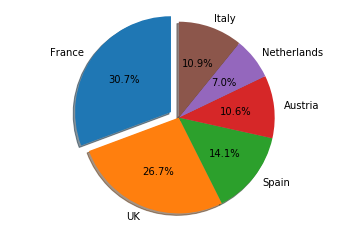

In [87]:
labels = 'France', 'UK', 'Spain', 'Austria', 'Netherlands', 'Italy'
sizes = [458, 399, 211, 158, 105, 162]
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Reviewer Nationality

In [88]:
national_count = data.groupBy("Reviewer_Nationality").count().orderBy('count', ascending=False).show()

+--------------------+------+
|Reviewer_Nationality| count|
+--------------------+------+
|     United Kingdom |245246|
| United States of...| 35437|
|          Australia | 21686|
|            Ireland | 14827|
| United Arab Emir...| 10235|
|       Saudi Arabia |  8951|
|        Netherlands |  8772|
|        Switzerland |  8678|
|            Germany |  7941|
|             Canada |  7894|
|             France |  7296|
|             Israel |  6610|
|              Italy |  6114|
|            Belgium |  6031|
|             Turkey |  5444|
|             Kuwait |  4920|
|              Spain |  4737|
|            Romania |  4552|
|             Russia |  3900|
|       South Africa |  3821|
+--------------------+------+
only showing top 20 rows



In [89]:
UK_rev = data.filter(data.Reviewer_Nationality.contains('United Kingdom')).select(
    'Reviewer_Nationality','Review_Total_Negative_Word_Counts').orderBy('Review_Total_Negative_Word_Counts', ascending=False).show()


+--------------------+---------------------------------+
|Reviewer_Nationality|Review_Total_Negative_Word_Counts|
+--------------------+---------------------------------+
|     United Kingdom |                              408|
|     United Kingdom |                              403|
|     United Kingdom |                              401|
|     United Kingdom |                              400|
|     United Kingdom |                              395|
|     United Kingdom |                              393|
|     United Kingdom |                              390|
|     United Kingdom |                              389|
|     United Kingdom |                              389|
|     United Kingdom |                              389|
|     United Kingdom |                              389|
|     United Kingdom |                              388|
|     United Kingdom |                              387|
|     United Kingdom |                              386|
|     United Kingdom |         

In [93]:
data.filter(data.Reviewer_Nationality.contains('United Kingdom')).select(
    'Reviewer_Nationality','Review_Total_Positive_Word_Counts').orderBy('Review_Total_Positive_Word_Counts', ascending=False).show()

+--------------------+---------------------------------+
|Reviewer_Nationality|Review_Total_Positive_Word_Counts|
+--------------------+---------------------------------+
|     United Kingdom |                              384|
|     United Kingdom |                              384|
|     United Kingdom |                              383|
|     United Kingdom |                              373|
|     United Kingdom |                              372|
|     United Kingdom |                              372|
|     United Kingdom |                              371|
|     United Kingdom |                              371|
|     United Kingdom |                              369|
|     United Kingdom |                              369|
|     United Kingdom |                              368|
|     United Kingdom |                              368|
|     United Kingdom |                              367|
|     United Kingdom |                              367|
|     United Kingdom |         

# Tags

In [94]:
leisure_trip = data.filter(data.Tags.contains('Leisure trip')).select('Tags')
leisure_trip.select(countDistinct('Tags').alias('Leisure trips Tags')).show()

+------------------+
|Leisure trips Tags|
+------------------+
|             37427|
+------------------+



In [95]:
Solo_traveler = data.filter(data.Tags.contains('Solo traveler')).select('Tags')
Solo_traveler.select(countDistinct('Tags').alias('Solo traveler Tags')).show()

+------------------+
|Solo traveler Tags|
+------------------+
|             12514|
+------------------+



In [96]:
mobile_device  = data.filter(data.Tags.contains('Submitted from a mobile device')).select('Tags')
mobile_device.select(countDistinct('Tags').alias('Submitted from a mobile device Tags')).show()

+-----------------------------------+
|Submitted from a mobile device Tags|
+-----------------------------------+
|                              30689|
+-----------------------------------+



In [97]:
With_pet = data.filter(data.Tags.contains('With a pet')).select('Tags')
With_pet.select(countDistinct('Tags').alias('With a pet Tags')).show()

+---------------+
|With a pet Tags|
+---------------+
|           1017|
+---------------+



In [98]:
Executive_Double_Room = data.filter(data.Tags.contains(' Executive Double Room')).select('Tags')
Executive_Double_Room.select(countDistinct('Tags').alias(' Executive Double Room Tags')).show()

+---------------------------+
| Executive Double Room Tags|
+---------------------------+
|                        647|
+---------------------------+



In [102]:
Single_Room= data.filter(data.Tags.contains('Single Room')).select('Tags')
Single_Room.select(countDistinct('Tags').alias('Single Room Tags')).show()

+----------------+
|Single Room Tags|
+----------------+
|            1847|
+----------------+



In [101]:
Double_Room= data.filter(data.Tags.contains('Double Room')).select('Tags')
Double_Room.select(countDistinct('Tags').alias('Double Room Tags')).show()

+----------------+
|Double Room Tags|
+----------------+
|           12600|
+----------------+



In [99]:
One_night = data.filter(data.Tags.contains('Stayed 1 night')).select('Tags')
One_night.select(countDistinct('Tags').alias('Stayed 1 night (Tags)')).show()

+---------------------+
|Stayed 1 night (Tags)|
+---------------------+
|                12562|
+---------------------+



In [100]:
Two_nights= data.filter(data.Tags.contains('Stayed 2 nights')).select('Tags')
Two_nights.select(countDistinct('Tags').alias('Stayed 2 nights (Tags)')).show()

+----------------------+
|Stayed 2 nights (Tags)|
+----------------------+
|                 11564|
+----------------------+



In [103]:
Three_nights= data.filter(data.Tags.contains('Stayed 3 nights')).select('Tags')
Three_nights.select(countDistinct('Tags').alias('Stayed 3 nights (Tags)')).show()

+----------------------+
|Stayed 3 nights (Tags)|
+----------------------+
|                 10124|
+----------------------+



In [104]:
Four_nights= data.filter(data.Tags.contains('Stayed 4 nights')).select('Tags')
Four_nights.select(countDistinct('Tags').alias('Stayed 4 nights (Tags)')).show()

+----------------------+
|Stayed 4 nights (Tags)|
+----------------------+
|                  7118|
+----------------------+



In [105]:
Five_nights= data.filter(data.Tags.contains('Stayed 5 nights')).select('Tags')
Five_nights.select(countDistinct('Tags').alias('Stayed 5 nights (Tags)')).show()

+----------------------+
|Stayed 5 nights (Tags)|
+----------------------+
|                  4622|
+----------------------+



In [107]:
Six_nights= data.filter(data.Tags.contains('Stayed 6 nights')).select('Tags')
Six_nights.select(countDistinct('Tags').alias('Stayed 6 nights (Tags)')).show()

+----------------------+
|Stayed 6 nights (Tags)|
+----------------------+
|                  2943|
+----------------------+



In [108]:
Seven_nights= data.filter(data.Tags.contains('Stayed 7 nights')).select('Tags')
Seven_nights.select(countDistinct('Tags').alias('Stayed 7 nights (Tags)')).show()

+----------------------+
|Stayed 7 nights (Tags)|
+----------------------+
|                  2466|
+----------------------+



In [109]:
Eight_nights= data.filter(data.Tags.contains('Stayed 8 nights')).select('Tags')
Eight_nights.select(countDistinct('Tags').alias('Stayed 8 nights (Tags)')).show()

+----------------------+
|Stayed 8 nights (Tags)|
+----------------------+
|                  1215|
+----------------------+



In [110]:
Nine_nights= data.filter(data.Tags.contains('Stayed 9 nights')).select('Tags')
Nine_nights.select(countDistinct('Tags').alias('Stayed 9 nights (Tags)')).show()

+----------------------+
|Stayed 9 nights (Tags)|
+----------------------+
|                   735|
+----------------------+



In [111]:
Ten_nights= data.filter(data.Tags.contains('Stayed 10 nights')).select('Tags')
Ten_nights.select(countDistinct('Tags').alias('Stayed 10 nights (Tags)')).show()

+-----------------------+
|Stayed 10 nights (Tags)|
+-----------------------+
|                    548|
+-----------------------+



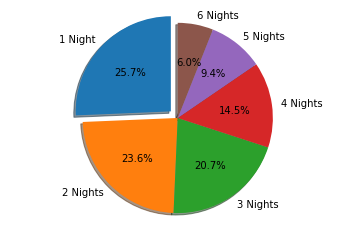

In [113]:
labels = '1 Night', '2 Nights', '3 Nights', '4 Nights', '5 Nights', '6 Nights'
sizes = [12562, 11564, 10124, 7118, 4622, 2943]
explode = (0.1, 0, 0, 0, 0, 0)  # only "explode" the 1nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()